# Project Title

## Topic
*What problem are you (or your stakeholder) trying to address?*
<br>
The effect education has on crime rates in Cincinnati


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
<br>
What is the coorelation education has to rising or falling crime rates in Cincinnati?
<br>
Which areas show the biggest coorelation between education and crime rates, and which ones show the least?


## What would an answer look like?
*What is your hypothesized answer to your question?*
<br>
I would still be using geographical charts and models like heat maps. I would use line graphs to compare education level/investment amounts to crime rates. Bar charts would be useful as well. 
<br>
An answer I want to see or atleast an outcome would be to help create solutions to crime rates using education. 


## Data Sources
*What 3 data sources have you identified for this project?*
<h3>Crimes committed in Cincinnati. Includes location data in particular. API</h3>
<br>
https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf
<br>
<h3>Hamilton Count School Locations. API</h3>
<br>
https://data-cagisportal.opendata.arcgis.com/datasets/countywide-school-locations/explore?showTable=true
<br>
<h3>Hamilton county school ratings.</h3>
<br>
https://infogram.com/ohio-report-card-2022-1hd12yx1ykkow6k
<h3>Cincinnati Census Data. database</h3>
<br>
https://www.cincinnati-oh.gov/planning/maps-and-data/census-demographics/2020-census-data/
<br>

*How are you going to relate these datasets?*
<br>
i will relate crime to school ratings and education levels using common location data.

*How will you use this data to answer your project question?*
<br>
i will use location data to show maps (heat maps). I will answer the question by showing a connection between crime and education using location data. I will see how scores for schools could be impacted, and will try to see if improving school performance can lower crime rates.

In [2]:
# Python ≥3.10 is required
import sys
assert sys.version_info >= (3, 10)

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# other imports
from wordcloud import WordCloud


In [5]:
# Importing the data
crime_data = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Crime_Incidents.csv')
traffic_stops = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Traffic_Stops__Drivers_.csv')
shootings = pd.read_csv('./datasets/PDI__Police_Data_Initiative__CPD_Shootings.csv')

C:\Users\jacko\AppData\Local\Temp\ipykernel_20844\2136623229.py:2: DtypeWarning: Columns (1,7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Crime_Incidents.csv')
C:\Users\jacko\AppData\Local\Temp\ipykernel_20844\2136623229.py:3: DtypeWarning: Columns (3,4,5,6,7,17,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_stops = pd.read_csv('./datasets/PDI__Police_Data_Initiative__Traffic_Stops__Drivers_.csv')


In [6]:
traffic_stops.sample(10)

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_DESC,INCIDENT_TYPE_ID,ACTIONTAKENCID,ACTIONTAKENCIDID,...,REPORT_TYPE_CID,SEX,RACE,FIELD_SUBJECT_CID,AGE_RANGE_CID,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CPD_NEIGHBORHOOD,DISTRICT
467708,35XX WOODFORD RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WARNING,2.0,...,CONTACT CARD,MALE,BLACK,DRIVER,18-25,NaN,NaN,NaN,NaN,NaN
421997,47XX PADDOCK RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CITATION TRAFFIC,3.0,...,CONTACT CARD,MALE,WHITE,DRIVER,26-35,NaN,NaN,NaN,NaN,NaN
157069,44XX ESTE AV,NaN,NaN,CP,ARREST,LCP160614000822,TRAFFIC STOP,TS,ARREST CAPIASWAR,7.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,P539,NaN,NaN,NaN,NaN
164172,16XX WESTWOOD AV,39.125673,-84.548675,CP,"534 - CONTACT CARD,ARR - ARRES",LCP160419000914,NaN,TSTOP,ARREST MISD.,6.0,...,CONTACT CARD,MALE,BLACK,DRIVER,26-35,P343,SOUTH FAIRMOUNT,EAST PRICE HILL,SOUTH FAIRMOUNT,NaN
398970,34XX BEEKMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CC - CONTACT CARD,MALE,BLACK,DRIVER,46+,NaN,NaN,NaN,NaN,NaN
163113,CLEVELAND AV/READING RD,NaN,NaN,CP,CITED,LCP160424001278,TRAFFIC STOP,TS,NaN,NaN,...,CONTACT CARD,FEMALE,BLACK,DRIVER,26-35,P433,NaN,NaN,NaN,NaN
219965,ARGUS RD/GROESBECK RD,NaN,NaN,CP,"369 - TOW REPORT,CIT - CITED,A",LCP150225000640,NaN,TSTOP,CITATION TRAFFIC,3.0,...,CC - CONTACT CARD,MALE,BLACK,DRIVER,26-35,P547,NaN,NaN,NaN,NaN
241296,47XX PROSPERITY PL,39.123332,-84.594773,CPD,534: CONTACT CARD,CPD220206000945,TRAFFIC STOP,TSTOP,CITATION TRAFFIC,3.0,...,CONTACT CARD,MALE,WHITE,DRIVER,46+,P321,WEST PRICE HILL,NaN,WEST PRICE HILL,NaN
593397,19XX QUEEN CITY AVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WARNING,2.0,...,CONTACT CARD,FEMALE,BLACK,DRIVER,46+,NaN,NaN,NaN,NaN,NaN
162043,ERLENE DR/QUEEN CITY AV,NaN,NaN,CP,534 - CONTACT CARD,LCP160425000812,NaN,TSTOP,WARNING,2.0,...,CONTACT CARD,MALE,BLACK,DRIVER,18-25,P336,NaN,NaN,NaN,NaN


In [7]:
crime_data.sample(10)

,INSTANCEID,INCIDENT_NO,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,UCR,DST,BEAT,OFFENSE,...,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD
437680,80E4B03B-6EF8-4CB0-9C39-0E018B04B03D,11101214,04/03/2011 06:30:00 PM,04/03/2011 03:40:00 PM,04/03/2011 03:40:00 PM,J--CLOSED,303.0,1,3.0,AGGRAVATED ROBBERY,...,UNKNOWN,BLACK,UNKNOWN,MALE,3.0,2.0,ROBBERY,45214.0,WEST END,WEST END
450892,C89A0B40-F341-4347-8BFB-5EE11C206EE5,21101153,03/28/2011 07:18:00 PM,03/28/2011 08:00:00 AM,03/28/2011 05:30:00 PM,Z--EARLY CLOSED,551.0,2,2.0,BURGLARY,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,BURGLARY/BREAKING ENTERING,45208.0,MOUNT LOOKOUT,HYDE PARK
208356,57D9D966-A71B-4E75-9BB2-129201B48B88,169030363,11/19/2016 07:06:00 PM,11/19/2016 06:45:00 PM,11/19/2016 07:00:00 PM,J--CLOSED,303.0,3,3.0,AGGRAVATED ROBBERY,...,UNKNOWN,BLACK,NOT OF HISPANIC ORIG,MALE,2.0,2.0,ROBBERY,45238.0,WESTWOOD,WESTWOOD
129145,5EF39821-3807-4074-8141-566714C3E57E,199000647,01/08/2019 02:49:00 PM,01/08/2019 02:00:00 PM,01/08/2019 02:30:00 PM,Z--EARLY CLOSED,600.0,5,4.0,THEFT,...,UNKNOWN,WHITE,NOT OF HISPANIC ORIG,MALE,1.0,1.0,THEFT,45224.0,COLLEGE HILL,COLLEGE HILL
345466,357C9980-7885-4595-BAEA-95209151093F,139015628,06/18/2013 02:40:00 PM,06/17/2013 06:00:00 PM,06/18/2013 09:00:00 AM,Z--EARLY CLOSED,552.0,4,6.0,BREAKING AND ENTERING,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,BURGLARY/BREAKING ENTERING,45216.0,NaN,NaN
113773,E7B57CC3-DEC8-4B8C-AE79-DA8A5F94340A,199011687,06/02/2019 01:01:00 AM,06/02/2019 12:30:00 AM,06/02/2019 01:00:00 AM,J--CLOSED,303.0,4,3,AGGRAVATED ROBBERY,...,18-25,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,1.0,ROBBERY,45229.0,AVONDALE,AVONDALE
78821,2EF1B18D-2806-404A-8923-B1EBE30C410A,209011840,06/07/2020 08:58:00 AM,06/07/2020 08:40:00 AM,06/07/2020 08:58:00 AM,D--VICTIM REFUSED TO COOPERATE,600.0,3,5,THEFT,...,31-40,BLACK,NOT OF HISPANIC ORIG,MALE,2.0,1.0,THEFT,45225.0,ENGLISH WOODS,ENGLISH WOODS
69018,98971265-4CFF-4D2D-9285-A73CE6544B5F,209021520,09/19/2020 02:44:00 AM,09/19/2020 02:35:00 AM,09/19/2020 02:40:00 AM,F--CLEARED BY ARREST - ADULT,810.0,3,2,ASSAULT,...,51-60,BLACK,NOT OF HISPANIC ORIG,MALE,1.0,2.0,PART 2 MINOR,45205.0,EAST PRICE HILL,EAST PRICE HILL
385936,B76EB3B0-F21D-487F-A87A-85C62551D19C,129022453,08/08/2012 08:00:00 AM,08/08/2012 12:30:00 AM,08/08/2012 08:00:00 AM,I--INVESTIGATION PENDING,600.0,4,6.0,THEFT,...,UNKNOWN,NaN,NaN,NaN,3.0,NaN,THEFT,45216.0,HARTWELL,NaN
89525,E1E3AF90-DF83-4AEB-A50B-9FC1BD91FAB4,209004636,02/29/2020 11:02:00 PM,02/29/2020 10:50:00 PM,02/29/2020 11:00:00 PM,F--CLEARED BY ARREST - ADULT,862.0,3,2.0,DOMESTIC VIOLENCE,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,PART 2 MINOR,45238.0,WEST PRICE HILL,WEST PRICE HILL


In [8]:
shootings.sample(10)

,DISTRICT,INCLOCATION_X,LATITUDE_X,LONGITUDE_X,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,OID,RMS_NO,VICCOUNT,CITYSTATEZIP,...,DATEOCCURRED,MONTHOCCURED,TIMEOCCURED,HROCCURED,DAYOCCURRED,RMSDUP,DATETIME,DSTFULL,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD
1429,1.0,7XX CLARK ST,39.108623,-84.527024,WEST END,WEST END,4696,199016324,1,NaN,...,07/23/2019 12:00:00 PM,JUL,233500.0,23.0,TUE,199016324,07/23/2019 11:35:00 PM,DISTRICT 1,NaN,WEST END
4372,4.0,5XX E UNIVERSITY AV,39.132845,-84.500214,AVONDALE,AVONDALE,228,40805298,1,NaN,...,07/26/2008 12:00:00 PM,JUL,NaN,NaN,SAT,40805298,07/26/2008 12:00:00 AM,DISTRICT 4,45219.0,AVONDALE
2410,5.0,1XX CRAFT ST,39.179564,-84.509757,WINTON HILLS,WINTON HILLS,3715,169028531,1,NaN,...,10/31/2016 12:00:00 PM,OCT,223500.0,22.0,MON,169028531,10/31/2016 10:35:00 PM,DISTRICT 5,NaN,WINTON HILLS
1527,4.0,23XX HIGHLAND AV,39.123312,-84.503407,MT AUBURN,MT. AUBURN,4598,199009129,1,NaN,...,05/04/2019 12:00:00 PM,MAY,132000.0,13.0,SAT,199009129,05/04/2019 01:20:00 PM,DISTRICT 4,NaN,MOUNT AUBURN
4406,5.0,51XX COLERAIN AV,39.183045,-84.567771,MT AIRY,MT. AIRY,197,50804344,1,NaN,...,07/09/2008 12:00:00 PM,JUL,NaN,NaN,WED,50804344,07/09/2008 12:00:00 AM,DISTRICT 5,45223.0,MOUNT AIRY
2169,4.0,65XX ROSEWOOD ST,39.191419,-84.488924,CARTHAGE,CARTHAGE,3956,179022940,1,NaN,...,06/16/2017 12:00:00 PM,JUN,205000.0,20.0,FRI,179022940,06/16/2017 08:50:00 PM,DISTRICT 4,NaN,CARTHAGE
1571,3.0,34XX BOUDINOT AV,39.151286,-84.603685,WESTWOOD,WESTWOOD,4554,199010129,1,NaN,...,03/01/2019 12:00:00 PM,MAR,230000.0,23.0,FRI,199010129,03/01/2019 11:00:00 PM,DISTRICT 3,NaN,WESTWOOD
4607,1.0,5XX W LIBERTY ST,39.113658,-84.527378,WEST END,WEST END,2160,139008257,1,"CINC, OH 45202",...,04/09/2013 12:00:00 PM,APR,210200.0,21.0,TUE,139008257,04/09/2013 09:02:00 PM,DISTRICT 1,45214.0,WEST END
5879,4.0,28XX PARK AV,39.130521,-84.485068,WALNUT HILLS,WALNUT HILLS,888,41001325,1,NaN,...,03/14/2010 12:00:00 PM,MAR,NaN,NaN,SUN,41001325,03/14/2010 12:00:00 AM,DISTRICT 4,45206.0,WALNUT HILLS
4185,5.0,10XX HILL CREST RD,39.188923,-84.538164,COLLEGE HILL,COLLEGE HILL,415,50808041,1,NaN,...,12/29/2008 12:00:00 PM,DEC,NaN,NaN,MON,50808041,12/29/2008 12:00:00 AM,DISTRICT 5,45224.0,COLLEGE HILL


In [9]:
crime_data.drop(crime_data.index[crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'] == 'nan'], inplace = True)
crime_data['DATE_REPORTED'] = pd.to_datetime(crime_data['DATE_REPORTED']).dt.normalize()
crime_data.drop(crime_data.index[crime_data['SUSPECT_RACE'] == 'UNKNOWN'], inplace = True)
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'] = crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].astype("str")

In [10]:
traffic_stops.drop(traffic_stops.index[traffic_stops['COMMUNITY_COUNCIL_NEIGHBORHOOD'] == 'NaN'], inplace = True)
traffic_stops.drop(traffic_stops.index[traffic_stops['LATITUDE_X'] == 'NaN'], inplace = True)
traffic_stops['DATE_REPORTED'] = pd.to_datetime(traffic_stops['DATE_REPORTED']).dt.normalize()


KeyboardInterrupt



In [ ]:
traffic_stops.sample()

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_DESC,INCIDENT_TYPE_ID,ACTIONTAKENCID,ACTIONTAKENCIDID,...,REPORT_TYPE_CID,SEX,RACE,FIELD_SUBJECT_CID,AGE_RANGE_CID,BEAT,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CPD_NEIGHBORHOOD,DISTRICT
517738,61XX MADISON RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WARNING,2.0,...,CONTACT CARD,MALE,WHITE,DRIVER,36-45,NaN,NaN,NaN,NaN,NaN


In [ ]:
traffic_stops_sample = traffic_stops.sample(1000)

<AxesSubplot:>

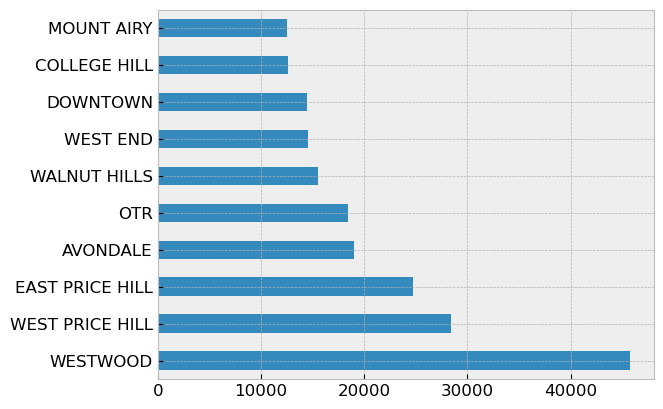

In [ ]:
# top 10 total crime
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

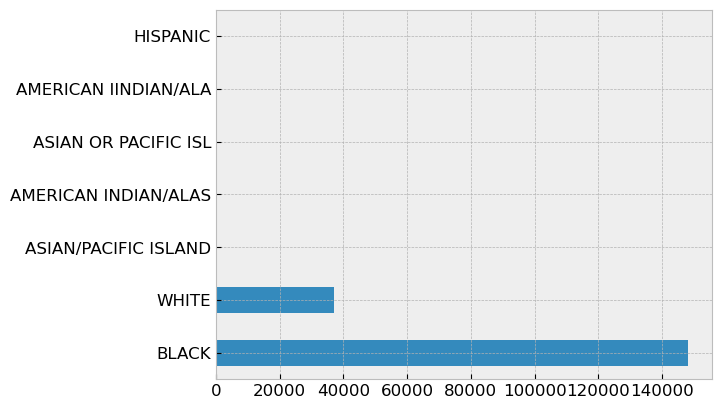

In [ ]:
# counts of crime by race
crime_data['SUSPECT_RACE'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

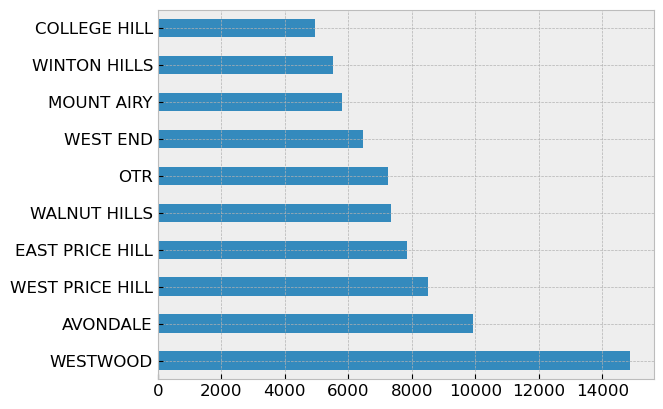

In [ ]:
# top 10 neighborhoods sorted by amount of black suspects
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].where(crime_data['SUSPECT_RACE'] == 'BLACK').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

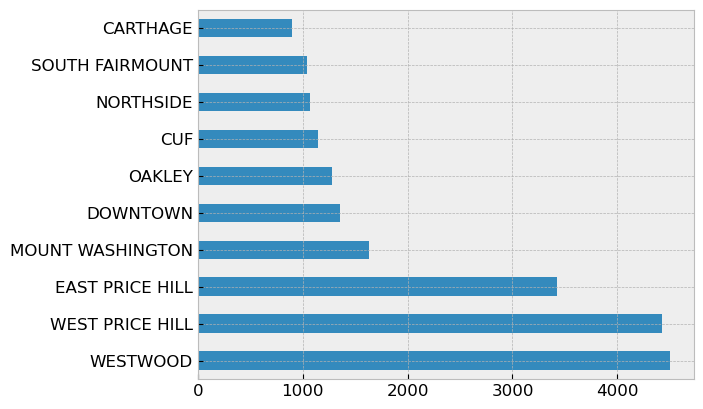

In [ ]:
# top 10 neighborhoods sorted by amount of white suspects
crime_data['COMMUNITY_COUNCIL_NEIGHBORHOOD'].where(crime_data['SUSPECT_RACE'] == 'WHITE').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

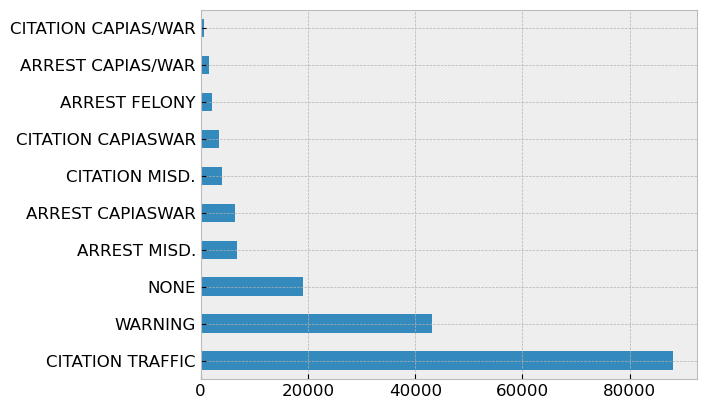

In [ ]:
# top 10 results of a traffic stop sorted by white drivers
traffic_stops['ACTIONTAKENCID'].where(traffic_stops['RACE'] == 'WHITE').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

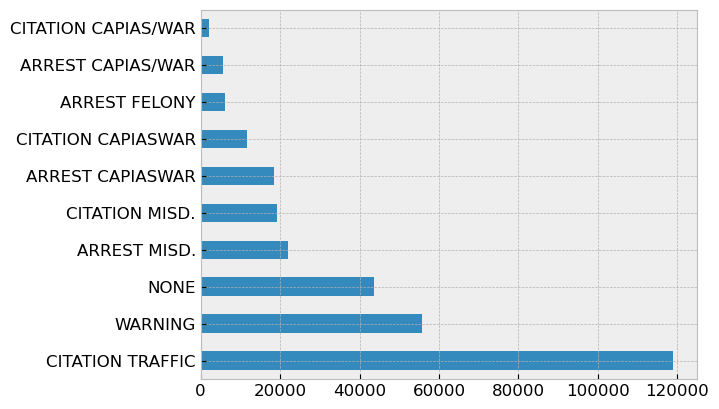

In [ ]:
# top 10 results of a traffic stop sorted by black drivers
traffic_stops['ACTIONTAKENCID'].where(traffic_stops['RACE'] == 'BLACK').value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

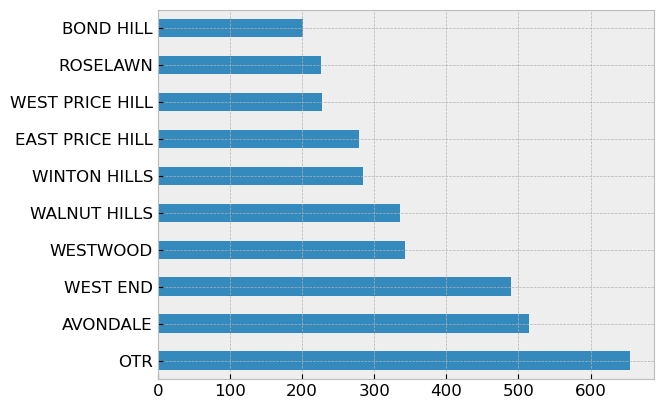

In [ ]:
# top 10 neighbordhoods sorted by amount of shootings
shootings['COMMUNITY_COUNCIL_NEIGHBORHOOD'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

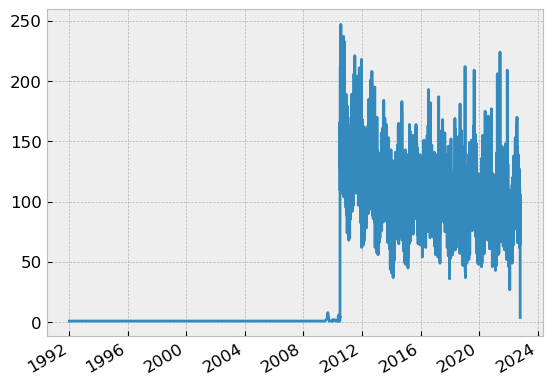

In [ ]:
# crime over time
crime_data['DATE_REPORTED'].value_counts()[:].plot()

<AxesSubplot:>

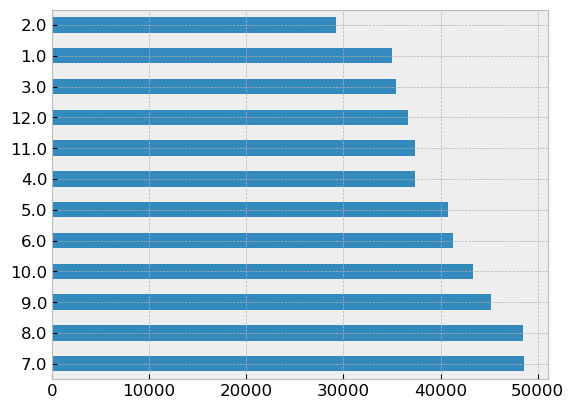

In [ ]:
# crime amounts by month ranked
crime_data['DATE_REPORTED'].dt.month.value_counts()[:].plot(kind = "barh")

<AxesSubplot:>

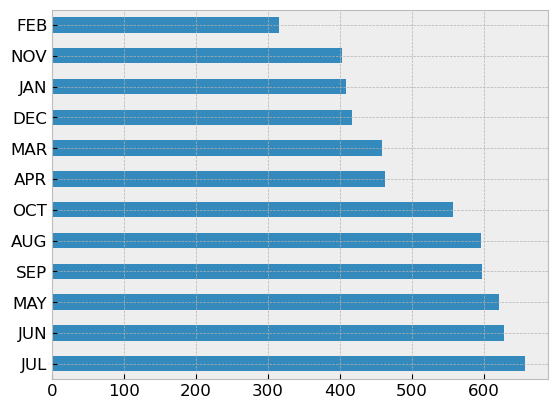

In [ ]:
# months ranked by shooting amount
shootings['MONTHOCCURED'].value_counts()[:].plot(kind = "barh")

<AxesSubplot:>

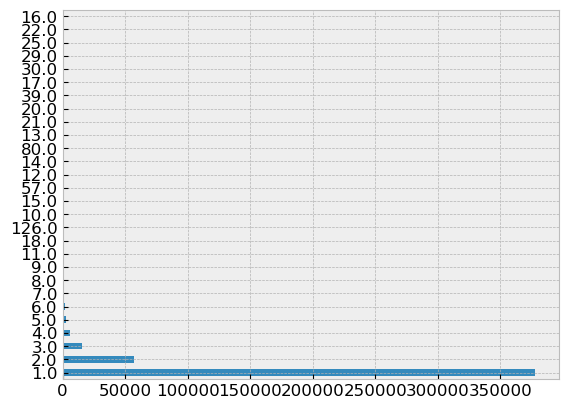

In [167]:
crime_data['TOTALNUMBERVICTIMS'].value_counts()[:].plot(kind = "barh")

<h2>Machine Learning Plan</h2>
<br>
<p>My goal is to use machine learning to answer my new question of how crime affects different areas and demographics within Cincinnati. What type of machine learning model are you planning to use?
i plan to use supeervised regression. This is because i want to use factors that could play into the likelyhood of a crime happening and then predict the outcome or likelihood of a crime.
What are the challenges have you identified/are you anticipating in building your machine learning model?
I will have to work on identifying different columns that are related for example different columns in traffic stops indicate an arrest. I'll have to identify those if i want to make a simple prediction of whether someone will be arrested or not. 
How are you planning to address these challenges? I will combine columns depending on the case. </p>

<h2>Machine Learning</h2>

In [11]:
shootings.isnull().sum()

DISTRICT                            84
INCLOCATION_X                        0
LATITUDE_X                           0
LONGITUDE_X                          0
CPD_NEIGHBORHOOD                    26
SNA_NEIGHBORHOOD                    26
OID                                  0
RMS_NO                               0
VICCOUNT                             0
CITYSTATEZIP                      3534
RACE                                12
SEX                                 10
AGE                                  0
TYPE                                 0
DATEOCCURRED                         0
MONTHOCCURED                         0
TIMEOCCURED                       1287
HROCCURED                         1287
DAYOCCURRED                          1
RMSDUP                               0
DATETIME                             0
DSTFULL                              0
ZIP                               2939
COMMUNITY_COUNCIL_NEIGHBORHOOD      59
dtype: int64

In [20]:
crime_data.isnull().sum()


INSTANCEID                             0
INCIDENT_NO                            1
DATE_REPORTED                        472
DATE_FROM                             18
DATE_TO                             1332
CLSD                                1472
UCR                                  124
DST                                  523
BEAT                                1436
OFFENSE                              106
LOCATION                              18
THEFT_CODE                        306449
FLOOR                             408981
SIDE                              412616
OPENING                           418667
HATE_BIAS                             35
DAYOFWEEK                           6461
RPT_AREA                            2958
CPD_NEIGHBORHOOD                    3418
WEAPONS                               47
DATE_OF_CLEARANCE                   9725
HOUR_FROM                             10
HOUR_TO                             1304
ADDRESS_X                           4051
LONGITUDE_X     

In [15]:
traffic_stops.isnull().sum()

ADDRESS_X                              3
LATITUDE_X                        349970
LONGITUDE_X                       349970
AGENCY                            363615
DISPOSITION_TEXT                  365741
EVENT_NUMBER                      363615
INCIDENT_TYPE_DESC                442212
INCIDENT_TYPE_ID                  363730
ACTIONTAKENCID                    134498
ACTIONTAKENCIDID                  134500
PRIORITY_                         420299
INSTANCE_ID                            0
IS_JUVENILE                       245305
INTERVIEW_NUMBER                       4
INTERVIEW_DATE                        70
VEHICLE_MAKE                        3433
VEHICLE_MODEL                       9061
VEHICLE_YEAR                        4568
CONTACT_TYPE_CID                    8766
LICENSE_PLATE_STATE                 6949
OFFICER_ASSIGNMENT                  6380
REPORT_TYPE_CID                        0
SEX                                    4
RACE                                   3
FIELD_SUBJECT_CI

In [12]:
# Scikit Learn imports
## For the pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## For preprocessing
from sklearn.preprocessing import (
  OneHotEncoder,
  OrdinalEncoder,
  StandardScaler
)
from sklearn.impute import (
  SimpleImputer
)
## For model selection
from sklearn.model_selection import (
  StratifiedShuffleSplit,
  train_test_split,
  cross_val_score,
  KFold,
  GridSearchCV
)

# Classifier Algorithms
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [392]:
crime_data.dropna(subset=['TOTALNUMBERVICTIMS'], inplace = True)

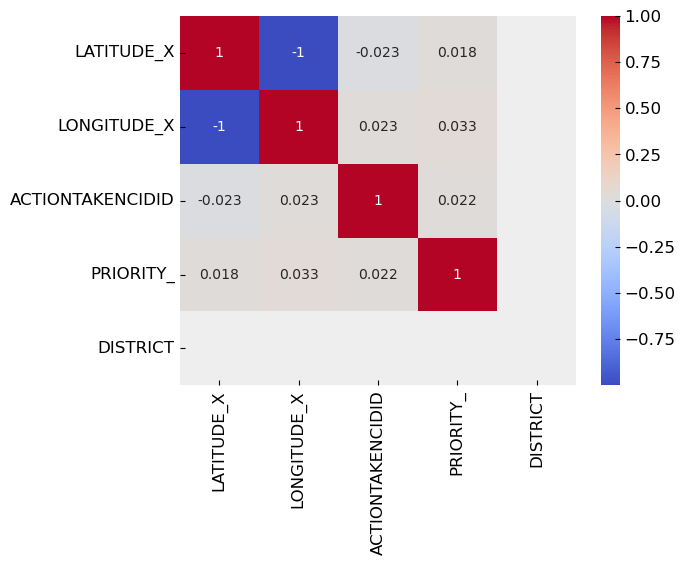

In [447]:
income_corr = traffic_stops.corr()

sns.heatmap(income_corr, annot=True, cmap="coolwarm")
plt.show()

In [448]:
train_set, test_set = train_test_split(crime_data, test_size= 0.2, random_state=45)

In [ ]:
train_set2, test_set2 = train_test_split(shootings, test_size= 0.2, random_state=45)

In [412]:
crime_X = train_set.drop('TOTALNUMBERVICTIMS', axis=1)
crime_y = train_set['TOTALNUMBERVICTIMS'].copy()

In [ ]:
shootings_X = train_set.drop('TOTALNUMBERVICTIMS', axis=1)
shootings_y = train_set['TOTALNUMBERVICTIMS'].copy()

In [ ]:
traffic = traffic_stops[['ACTIONTAKENCIDID','SEX', 'RACE', 'AGE_RANGE_CID']].copy()

In [453]:
shootings.sample(50)

,DISTRICT,INCLOCATION_X,LATITUDE_X,LONGITUDE_X,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,OID,RMS_NO,VICCOUNT,CITYSTATEZIP,...,DATEOCCURRED,MONTHOCCURED,TIMEOCCURED,HROCCURED,DAYOCCURRED,RMSDUP,DATETIME,DSTFULL,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD
2295,4.0,45XX PADDOCK RD,39.168166,-84.477729,PADDOCK HILLS,NORTH AVONDALE - PADDOCK HILLS,3831,179004518,1,NaN,...,02/17/2017 12:00:00 PM,FEB,191400.0,19.0,FRI,179004518,02/17/2017 07:14:00 PM,DISTRICT 4,NaN,PADDOCK HILLS
5010,5.0,53XX WINNESTE AV,39.188520,-84.514438,WINTON HILLS,WINTON HILLS,1757,129006793,1,"CIN, OH 45232",...,03/16/2012 12:00:00 PM,MAR,222600.0,22.0,FRI,129006793,03/16/2012 10:26:00 PM,DISTRICT 5,45232.0,WINTON HILLS
6117,1.0,XX GREEN ST,39.114032,-84.516643,OVER-THE-RHINE,OVER-THE-RHINE,650,10903314,1,NaN,...,07/25/2009 12:00:00 PM,JUL,NaN,NaN,SAT,10903314,07/25/2009 12:00:00 AM,DISTRICT 1,45202.0,OTR
1526,4.0,8XX HUTCHINS AV,39.143993,-84.486143,AVONDALE,AVONDALE,4599,199009228,2,NaN,...,05/05/2019 12:00:00 PM,MAY,204100.0,20.0,SUN,199009228,05/05/2019 08:41:00 PM,DISTRICT 4,NaN,AVONDALE
4116,4.0,1XX E GALBRAITH RD,39.212428,-84.467846,HARTWELL,HARTWELL,486,40901523,3,NaN,...,03/07/2009 12:00:00 PM,MAR,NaN,NaN,SAT,40901523,03/07/2009 12:00:00 AM,DISTRICT 4,45216.0,HARTWELL
433,4.0,12XX LAIDLAW AV,39.177412,-84.475802,BOND HILL,BOND HILL,5839,229005557,1,NaN,...,03/11/2022 12:00:00 PM,MAR,12600.0,1.0,FRI,229005557,03/11/2022 01:26:00 AM,DISTRICT 4,NaN,BOND HILL
5562,5.0,2XX KLOTTER AV,39.121865,-84.523485,CUF,CUF,1205,51006836,1,"CINC, OH 45219",...,11/07/2010 12:00:00 PM,NOV,NaN,NaN,SUN,51006836,11/07/2010 12:00:00 AM,DISTRICT 5,45219.0,CUF
2332,4.0,22XX BURNET AV,39.121540,-84.502045,MT AUBURN,MT. AUBURN,3794,179001789,2,NaN,...,01/18/2017 12:00:00 PM,JAN,173100.0,17.0,WED,179001789,01/18/2017 05:31:00 PM,DISTRICT 4,NaN,MOUNT AUBURN
5030,4.0,3XX NORTHERN AV,39.143992,-84.502733,AVONDALE,AVONDALE,1737,129004185,1,"CINC, OH 45211",...,02/16/2012 12:00:00 PM,FEB,134500.0,13.0,THU,129004185,02/16/2012 01:45:00 PM,DISTRICT 4,45229.0,AVONDALE
1330,5.0,49XX HAWAIIAN TE,39.183150,-84.563490,MT AIRY,MT. AIRY,4795,199023172,2,NaN,...,10/05/2019 12:00:00 PM,OCT,210400.0,21.0,SAT,199023172,10/05/2019 09:04:00 PM,DISTRICT 5,NaN,MOUNT AIRY


In [413]:
train_set.drop(['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO', 'CLSD', 'UCR', 'DST', 'BEAT', 'THEFT_CODE', 'FLOOR', 'SIDE', 'OPENING', 'DATE_OF_CLEARANCE', 'HOUR_TO'], axis=1, inplace=True)
test_set.drop(['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO', 'CLSD', 'UCR', 'DST', 'BEAT', 'THEFT_CODE', 'FLOOR', 'SIDE', 'OPENING', 'DATE_OF_CLEARANCE', 'HOUR_TO'], axis=1, inplace=True)

In [414]:
train_set.drop(['RPT_AREA', 'CPD_NEIGHBORHOOD', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X', 'UCR_GROUP', 'SNA_NEIGHBORHOOD', 'HOUR_FROM', 'ZIP'], axis=1, inplace=True)
test_set.drop(['RPT_AREA', 'CPD_NEIGHBORHOOD', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X', 'UCR_GROUP', 'SNA_NEIGHBORHOOD', 'HOUR_FROM', 'ZIP'], axis=1, inplace=True)

In [ ]:
'DAYOFWEEK', 'HATE_BIAS', 'OFFENSE', 'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'WEAPONS', 'LOCATION'

In [397]:
train_set.isnull().sum()

OFFENSE                              0
LOCATION                             0
HATE_BIAS                            0
DAYOFWEEK                           48
WEAPONS                              0
VICTIM_AGE                           0
VICTIM_RACE                        645
VICTIM_ETHNICITY                   645
VICTIM_GENDER                      645
SUSPECT_AGE                          0
SUSPECT_RACE                      2135
SUSPECT_ETHNICITY                 2135
SUSPECT_GENDER                    2135
TOTALNUMBERVICTIMS                   0
TOTALSUSPECTS                     2134
COMMUNITY_COUNCIL_NEIGHBORHOOD       0
dtype: int64

In [415]:
drop_columns = ['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO', 'CLSD', 'UCR', 'DST', 'BEAT', 'THEFT_CODE', 'FLOOR', 'SIDE', 'OPENING', 'DATE_OF_CLEARANCE', 'HOUR_TO', 'RPT_AREA', 'CPD_NEIGHBORHOOD', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X', 'UCR_GROUP', 'SNA_NEIGHBORHOOD', 'HOUR_FROM', 'ZIP']

full_pipeline = ColumnTransformer([
  ('drop_columns', 'drop', drop_columns),
], remainder='passthrough')

In [416]:
# Apply the Transformation
transformed_train_set = full_pipeline.fit_transform(crime_X)

# Transform the numpy n-dimensional array into a pandas dataframe
transformed_train_set = pd.DataFrame(transformed_train_set, columns=crime_X.columns.drop(drop_columns), index=crime_X.index)
transformed_train_set.head()

,OFFENSE,LOCATION,HATE_BIAS,DAYOFWEEK,WEAPONS,VICTIM_AGE,VICTIM_RACE,VICTIM_ETHNICITY,VICTIM_GENDER,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALSUSPECTS,COMMUNITY_COUNCIL_NEIGHBORHOOD
180963,ASSAULT,01-SINGLE FAMILY 2 STORY,N--NO BIAS/NOT APPLICABLE,SATURDAY,"40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)",31-40,WHITE,NOT OF HISPANIC ORIG,FEMALE,18-25,WHITE,NOT OF HISPANIC ORIG,FEMALE,3.0,WEST PRICE HILL
397400,CRIMINAL DAMAGING/ENDANGERING,47-STREET,N--NO BIAS/NOT APPLICABLE,SATURDAY,99--NONE,18-25,WHITE,UNKNOWN,MALE,18-25,WHITE,NOT OF HISPANIC ORIG,MALE,1.0,CUF
167198,THEFT,02-MULTI FAMILY APARTMENT,N--NO BIAS/NOT APPLICABLE,THURSDAY,99 - NONE,61-70,BLACK,NOT OF HISPANIC ORIG,MALE,UNKNOWN,NaN,NaN,NaN,NaN,WESTWOOD
208035,THEFT,01-SINGLE FAMILY CONDO,N--NO BIAS/NOT APPLICABLE,NaN,99 - NONE,18-25,WHITE,NOT OF HISPANIC ORIG,MALE,UNKNOWN,NaN,NaN,NaN,NaN,WEST END
263547,UNAUTHORIZED USE OF MOTOR VEHICLE,01-SINGLE FAMILY 2 STORY,N--NO BIAS/NOT APPLICABLE,SUNDAY,99 - NONE,26-30,BLACK,NOT OF HISPANIC ORIG,FEMALE,UNKNOWN,NaN,NaN,NaN,NaN,EAST PRICE HILL


In [442]:
num_features = ['TOTALSUSPECTS']
cat_features = ['OFFENSE', 'LOCATION', 'HATE_BIAS','DAYOFWEEK','WEAPONS', 'VICTIM_AGE', 'VICTIM_RACE', 'VICTIM_ETHNICITY', 'VICTIM_GENDER', 'SUSPECT_AGE', 'SUSPECT_RACE', 'SUSPECT_ETHNICITY', 'SUSPECT_GENDER', 'COMMUNITY_COUNCIL_NEIGHBORHOOD']

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('encode', OrdinalEncoder())
])

# modified the previous `full_pipeline` to include the `num_pipeline` and `cat_pipeline`
full_pipeline = ColumnTransformer([
  ('drop_columns', 'drop', drop_columns),
  ('num', num_pipeline, num_features),
  ('cat', cat_pipeline, cat_features)
])

In [443]:
first_column = crime_X.pop('TOTALSUSPECTS')
crime_X.insert(0, 'TOTALSUSPECTS', first_column)

In [444]:
# Apply the Transformation
transformed_train_set = full_pipeline.fit_transform(crime_X)

# Transform the numpy n-dimensional array into a pandas dataframe
transformed_train_set = pd.DataFrame(transformed_train_set, columns=crime_X.columns.drop(drop_columns), index=crime_X.index)
transformed_train_set.head()

,TOTALSUSPECTS,OFFENSE,LOCATION,HATE_BIAS,DAYOFWEEK,WEAPONS,VICTIM_AGE,VICTIM_RACE,VICTIM_ETHNICITY,VICTIM_GENDER,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,COMMUNITY_COUNCIL_NEIGHBORHOOD
180963,2.155334,8.0,0.0,6.0,2.0,20.0,2.0,6.0,3.0,0.0,0.0,2.0,2.0,0.0,59.0
397400,-0.363683,12.0,52.0,6.0,2.0,29.0,0.0,6.0,4.0,1.0,0.0,2.0,2.0,1.0,12.0
167198,-0.363683,48.0,8.0,6.0,4.0,28.0,5.0,3.0,3.0,1.0,8.0,1.0,2.0,1.0,60.0
208035,-0.363683,48.0,3.0,6.0,0.0,28.0,0.0,6.0,3.0,1.0,8.0,1.0,2.0,1.0,58.0
263547,-0.363683,50.0,0.0,6.0,3.0,28.0,1.0,3.0,3.0,0.0,8.0,1.0,2.0,1.0,17.0


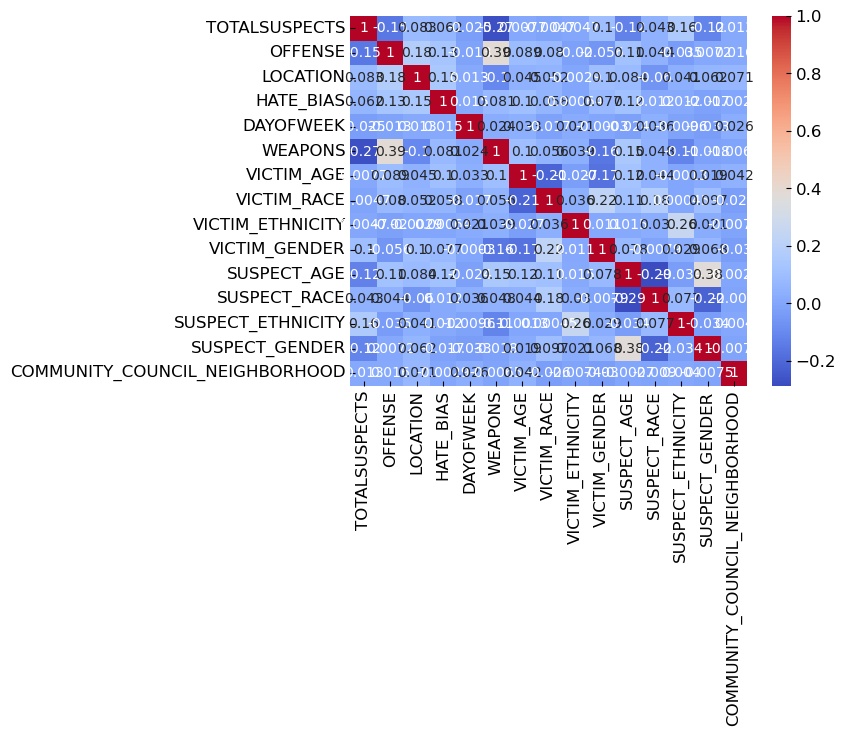

In [445]:
income_corr = transformed_train_set.corr()

sns.heatmap(income_corr, annot=True, cmap="coolwarm")
plt.show()

In [433]:
transformed_train_set.isnull().sum()

TOTALSUSPECTS                     0
OFFENSE                           0
LOCATION                          0
HATE_BIAS                         0
DAYOFWEEK                         0
WEAPONS                           0
VICTIM_AGE                        0
VICTIM_RACE                       0
VICTIM_ETHNICITY                  0
VICTIM_GENDER                     0
SUSPECT_AGE                       0
SUSPECT_RACE                      0
SUSPECT_ETHNICITY                 0
SUSPECT_GENDER                    0
COMMUNITY_COUNCIL_NEIGHBORHOOD    0
dtype: int64

In [432]:
crime_y.sample(10)

119643    1.0
408170    1.0
2581      1.0
287400    1.0
55064     1.0
52860     1.0
12211     4.0
294759    3.0
460814    1.0
137468    1.0
Name: TOTALNUMBERVICTIMS, dtype: float64

In [431]:
# imported DummyClassifier and the metrics packages (first cell)
dummy_classifier = DummyClassifier(strategy='stratified')
dummy_classifier.fit(transformed_train_set, crime_y)
dummy_classifier.score(transformed_train_set, crime_y) # accuracy

0.67425